# Support Vector Machine (SVM) là một thuật toán thuộc nhóm Supervised Learning (Học có giám sát) dùng để phân chia dữ liệu (Classification) thành các nhóm riêng biệt.

## Ở bài này chúng ta sẽ thực hành xem xét bệnh nhân có bị mắc ung thư hay không dựa vào tập dữ liệu cho trước

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
# numpy, pandas, seaborn, matplotlib là các thư viện cơ bản trong Python
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
# ta lấy data từ thư viện Sklearn

In [3]:
cancer = load_breast_cancer()
# đặt tên cho bảng dữ liệu

In [4]:
cancer.keys()
# xem các "thuộc tính" trong tập dữ liệu

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
df_feat = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
# ta lấy data theo trường 'future_names'

In [7]:
df_feat.head()
# dữ liệu có tới 30 cột mô tả các future

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df_target = pd.DataFrame(cancer['target'], columns=['target'])

In [9]:
df_target.head()
# taget = 0, bệnh nhân không có bệnh ung thư và ngược lại

,target
0,0
1,0
2,0
3,0
4,0


In [10]:
df = pd.concat([df_feat,df_target],axis=1)
# phương thức concat để gộp hai bảng lại với nhau

In [11]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
df.info()
# xem kiểu dữ liệu và giá trị Null trong tập dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [15]:
df['target'].value_counts()
# trong tập dữ liệu có 357 người mắc bệnh

1    357
0    212
Name: target, dtype: int64

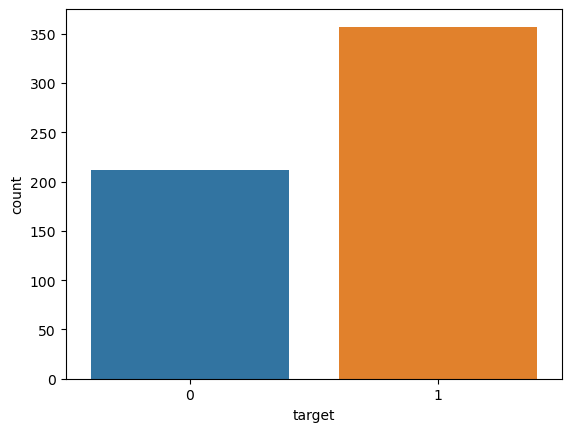

In [16]:
sns.countplot(data=df, x='target');

In [17]:
df.corr()['target'].sort_values(ascending=False)
# xét tương quan của 'target' so với các future khác

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

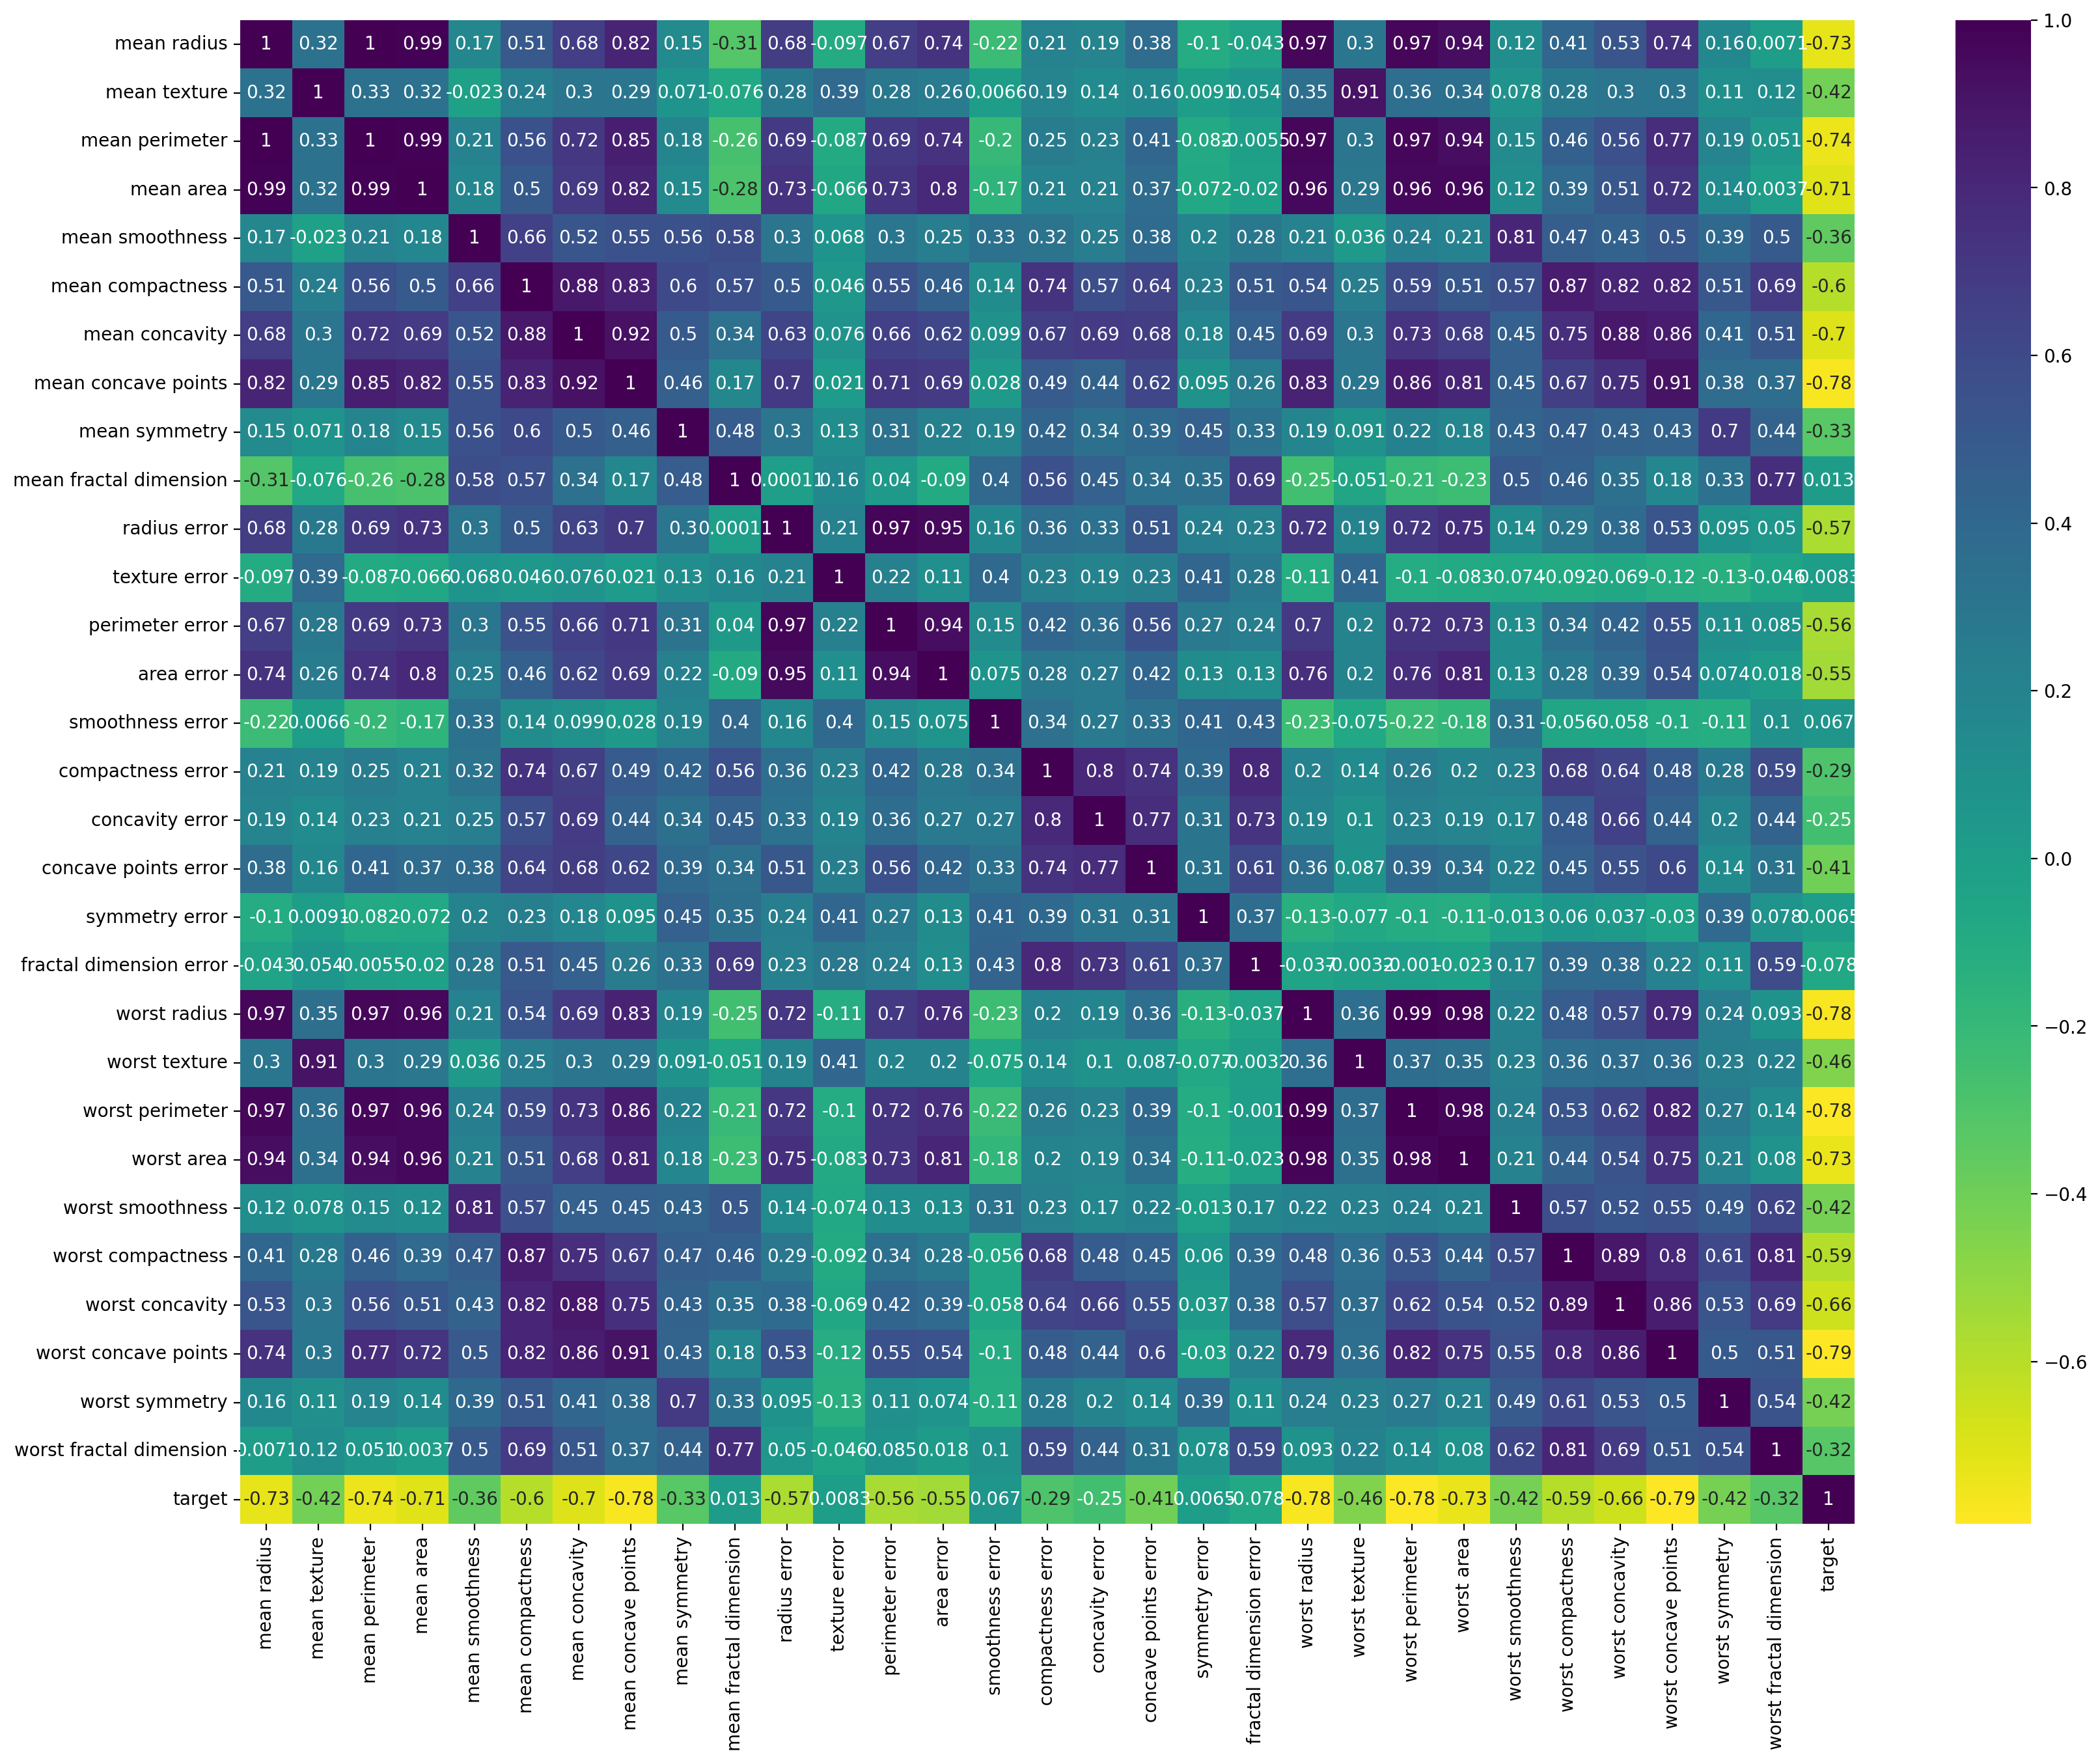

In [19]:
plt.figure(figsize=(20,15), dpi=200)
sns.heatmap(df.corr(), annot= True, cmap='viridis_r');
# sử dụng biểu đồ Heatmap để trực quan hóa sự tương quan này

# Train Test Split

## Sau khi có dữ liệu chuẩn ta tiến hành huấn luyện model

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(df_feat, df_target,test_size=0.3, random_state=101)

# Support Vector Classifier

In [22]:
from sklearn.svm import SVC

In [23]:
svc = SVC()

In [25]:
svc.fit(x_train,y_train.values.ravel())

SVC()

# Predictions and Evaluations

In [26]:
predictions = svc.predict(x_test)

In [28]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


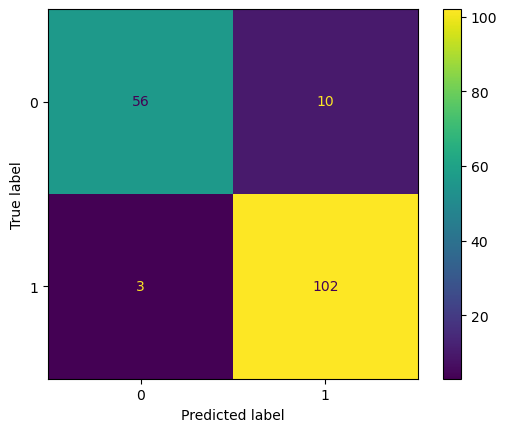

In [30]:
plot_confusion_matrix(svc, x_test,y_test);

# Gridsearch

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [33]:
parameter = {
        'C' : [0.1, 1, 10, 100, 1000],
    # 'kernel' : ['poly', 'rbf', 'sigmoid'],
    # 'degree' : [3, 4, 5],
        'gamma' :[0.0001, 0.001, 0.01, 0.1, 1],
}
# các thuộc tính của SVC

In [34]:
grid = GridSearchCV(SVC(), parameter, cv=5, verbose=2, refit=True)

In [36]:
grid.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ................................C=0.1, gamma=0.0001; total time=   0.0s
[CV] END ................................C=0.1, gamma=0.0001; total time=   0.0s
[CV] END ................................C=0.1, gamma=0.0001; total time=   0.0s
[CV] END ................................C=0.1, gamma=0.0001; total time=   0.0s
[CV] END ................................C=0.1, gamma=0.0001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

[CV] END ................................C=1000, gamma=0.001; total time=   0.0s
[CV] END ................................C=1000, gamma=0.001; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
             verbose=2)

In [37]:
grid.best_params_

{'C': 1, 'gamma': 0.0001}

In [38]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [39]:
predictions = grid.predict(x_test)

In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


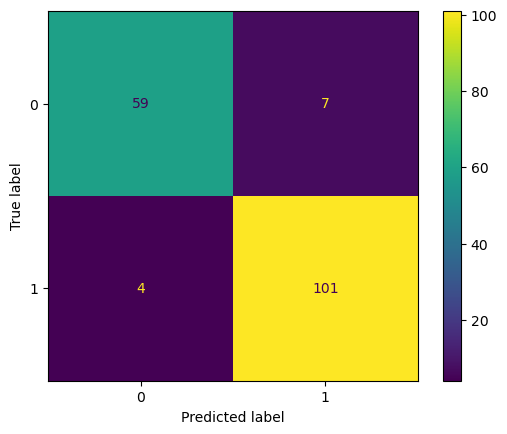

In [42]:
plot_confusion_matrix(grid, x_test,y_test);